In [4]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [7]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [8]:
population_model = "PBH-lognormal-2nd"
cosmology_model = 'flatLCDM'
outdir = f'results/H0_GWTC-3_{population_model}_{cosmology_model}_final/'
injections.update_cut(snr_cut=9, ifar_cut=0)

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [9]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

23:21 bilby INFO    : Running for label 'dynesty', output will be saved to 'results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final/'
23:21 bilby INFO    : Search parameters:
23:21 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
23:21 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
23:21 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
23:21 bilby INFO    :   H0 = 67.4
23:21 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:142: RuntimeWarning: divide by zero encountered in log
23:23 bilby INFO    : Single likelihood evaluation took 1.268e+00 s


0it [00:00, ?it/s]

23:23 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f161d262490>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
23:23 bilby INFO    : Checkpoint every check_point_delta_t = 60s
23:23 bilby INFO    : Using dynesty version 1.0.1
23:23 bilby INFO    : Using the bilby-implemented rwalk sampl

533it [21:18,  3.88it/s, bound:0 nc: 13 ncall:1.5e+03 eff:35.7% logz=-2084.20+/-0.17 dlogz:328.682>0.1]     

23:44 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


774it [22:44,  1.77it/s, bound:0 nc:  5 ncall:2.5e+03 eff:31.1% logz=-1902.83+/-0.15 dlogz:144.876>0.1]

23:46 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


937it [24:13,  1.47it/s, bound:0 nc:  7 ncall:3.5e+03 eff:26.7% logz=-1867.70+/-0.14 dlogz:110.542>0.1]

23:47 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1068it [25:39,  1.58it/s, bound:0 nc:  8 ncall:4.5e+03 eff:23.7% logz=-1849.20+/-0.14 dlogz:93.433>0.1] 

23:49 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1164it [27:08,  1.03it/s, bound:0 nc: 11 ncall:5.5e+03 eff:21.1% logz=-1838.86+/-0.14 dlogz:82.880>0.1]

23:50 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1243it [28:36,  1.52s/it, bound:0 nc: 41 ncall:6.6e+03 eff:19.0% logz=-1832.67+/-0.14 dlogz:76.505>0.1]

23:52 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1325it [30:03,  2.03s/it, bound:0 nc:104 ncall:7.6e+03 eff:17.5% logz=-1826.27+/-0.14 dlogz:69.947>0.1]

23:53 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1379it [31:28,  1.58s/it, bound:0 nc: 32 ncall:8.6e+03 eff:16.0% logz=-1822.23+/-0.15 dlogz:65.858>0.1]

23:54 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1432it [32:56,  1.53s/it, bound:0 nc: 30 ncall:9.6e+03 eff:14.9% logz=-1817.65+/-0.15 dlogz:61.109>0.1]

23:56 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1481it [34:23,  1.14s/it, bound:0 nc: 27 ncall:1.1e+04 eff:13.9% logz=-1814.83+/-0.15 dlogz:58.176>0.1]

23:57 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1527it [35:50,  2.38s/it, bound:0 nc: 54 ncall:1.2e+04 eff:13.1% logz=-1812.13+/-0.15 dlogz:55.405>0.1]

23:59 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1561it [37:19,  3.81s/it, bound:0 nc: 35 ncall:1.3e+04 eff:12.3% logz=-1809.33+/-0.15 dlogz:52.565>0.1]

00:00 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1593it [38:49,  2.92s/it, bound:0 nc: 11 ncall:1.4e+04 eff:11.6% logz=-1807.20+/-0.15 dlogz:50.335>0.1]

00:02 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1629it [40:14,  3.00s/it, bound:0 nc: 84 ncall:1.5e+04 eff:11.1% logz=-1805.13+/-0.15 dlogz:48.189>0.1]

00:03 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1667it [41:47,  2.90s/it, bound:0 nc: 95 ncall:1.6e+04 eff:10.6% logz=-1803.32+/-0.15 dlogz:46.302>0.1]

00:05 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1701it [43:19,  4.98s/it, bound:0 nc:116 ncall:1.7e+04 eff:10.1% logz=-1801.43+/-0.15 dlogz:44.341>0.1]

00:06 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1705it [44:57, 20.06s/it, bound:1 nc: 43 ncall:1.7e+04 eff:10.0% logz=-1801.21+/-0.15 dlogz:44.114>0.1]

00:08 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1736it [46:16,  4.95s/it, bound:4 nc: 32 ncall:1.8e+04 eff:9.6% logz=-1799.71+/-0.15 dlogz:42.545>0.1] 

00:09 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1766it [47:32,  4.00s/it, bound:7 nc: 55 ncall:1.9e+04 eff:9.3% logz=-1798.18+/-0.15 dlogz:40.955>0.1]

00:10 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1796it [48:51,  3.77s/it, bound:10 nc: 29 ncall:2.0e+04 eff:9.0% logz=-1796.77+/-0.15 dlogz:39.488>0.1]

00:12 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1856it [51:33,  3.24s/it, bound:16 nc: 37 ncall:2.2e+04 eff:8.5% logz=-1794.54+/-0.15 dlogz:37.129>0.1]

00:14 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1886it [52:54,  2.97s/it, bound:19 nc: 34 ncall:2.3e+04 eff:8.2% logz=-1793.31+/-0.15 dlogz:35.834>0.1]

00:16 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1948it [55:31,  2.63s/it, bound:26 nc: 31 ncall:2.5e+04 eff:7.8% logz=-1790.98+/-0.15 dlogz:33.377>0.1]

00:18 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1978it [56:54,  2.69s/it, bound:29 nc: 32 ncall:2.6e+04 eff:7.6% logz=-1789.93+/-0.15 dlogz:32.264>0.1]

00:20 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2009it [58:15,  2.67s/it, bound:32 nc: 32 ncall:2.7e+04 eff:7.4% logz=-1788.98+/-0.15 dlogz:31.260>0.1]

00:21 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2037it [59:35,  2.79s/it, bound:35 nc: 33 ncall:2.8e+04 eff:7.3% logz=-1787.81+/-0.15 dlogz:30.031>0.1]

00:23 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2064it [1:00:58,  2.95s/it, bound:39 nc: 34 ncall:2.9e+04 eff:7.1% logz=-1786.79+/-0.16 dlogz:28.956>0.1]

00:24 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2093it [1:02:28,  3.05s/it, bound:42 nc: 33 ncall:3.0e+04 eff:6.9% logz=-1785.88+/-0.15 dlogz:27.989>0.1]

00:25 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2120it [1:03:54,  3.17s/it, bound:46 nc: 36 ncall:3.1e+04 eff:6.8% logz=-1785.00+/-0.15 dlogz:27.056>0.1]

00:27 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2155it [1:05:28,  3.07s/it, bound:50 nc: 34 ncall:3.3e+04 eff:6.6% logz=-1784.05+/-0.15 dlogz:26.033>0.1]

00:28 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2179it [1:06:46,  3.79s/it, bound:52 nc: 37 ncall:3.3e+04 eff:6.5% logz=-1783.26+/-0.16 dlogz:25.199>0.1]

00:30 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2210it [1:08:13,  3.72s/it, bound:56 nc: 38 ncall:3.5e+04 eff:6.4% logz=-1782.24+/-0.16 dlogz:24.110>0.1]

00:31 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2238it [1:09:39,  3.80s/it, bound:59 nc: 38 ncall:3.6e+04 eff:6.3% logz=-1781.48+/-0.16 dlogz:23.292>0.1]

00:33 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2268it [1:10:58,  3.47s/it, bound:63 nc: 35 ncall:3.7e+04 eff:6.2% logz=-1780.75+/-0.16 dlogz:22.502>0.1]

00:34 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2297it [1:12:19,  3.40s/it, bound:66 nc: 32 ncall:3.8e+04 eff:6.1% logz=-1780.11+/-0.15 dlogz:21.800>0.1]

00:35 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2326it [1:13:45,  3.44s/it, bound:70 nc: 29 ncall:3.9e+04 eff:6.0% logz=-1779.52+/-0.15 dlogz:21.154>0.1]

00:37 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2355it [1:15:12,  3.43s/it, bound:73 nc: 38 ncall:4.0e+04 eff:5.9% logz=-1778.95+/-0.15 dlogz:20.524>0.1]

00:38 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2385it [1:16:39,  3.32s/it, bound:77 nc: 36 ncall:4.1e+04 eff:5.8% logz=-1778.36+/-0.15 dlogz:19.869>0.1]

00:40 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2413it [1:18:03,  3.27s/it, bound:80 nc: 38 ncall:4.2e+04 eff:5.7% logz=-1777.84+/-0.15 dlogz:19.293>0.1]

00:41 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2443it [1:19:29,  3.12s/it, bound:83 nc: 38 ncall:4.3e+04 eff:5.6% logz=-1777.25+/-0.16 dlogz:18.651>0.1]

00:42 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2473it [1:20:55,  3.00s/it, bound:87 nc: 39 ncall:4.5e+04 eff:5.6% logz=-1776.68+/-0.16 dlogz:18.014>0.1]

00:44 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2502it [1:22:25,  3.49s/it, bound:91 nc: 40 ncall:4.6e+04 eff:5.5% logz=-1776.11+/-0.16 dlogz:17.476>0.1]

00:45 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2531it [1:23:50,  3.60s/it, bound:94 nc: 38 ncall:4.7e+04 eff:5.4% logz=-1775.58+/-0.16 dlogz:16.891>0.1]

00:47 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2560it [1:25:14,  3.56s/it, bound:98 nc: 39 ncall:4.8e+04 eff:5.3% logz=-1775.15+/-0.16 dlogz:16.399>0.1]

00:48 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2591it [1:26:43,  3.41s/it, bound:102 nc: 37 ncall:4.9e+04 eff:5.3% logz=-1774.73+/-0.16 dlogz:15.912>0.1]

00:50 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2620it [1:28:10,  3.36s/it, bound:106 nc: 39 ncall:5.0e+04 eff:5.2% logz=-1774.33+/-0.16 dlogz:15.616>0.1]

00:51 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2651it [1:29:40,  3.19s/it, bound:109 nc: 37 ncall:5.2e+04 eff:5.1% logz=-1773.90+/-0.16 dlogz:15.126>0.1]

00:53 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2681it [1:31:10,  3.11s/it, bound:113 nc: 39 ncall:5.3e+04 eff:5.1% logz=-1773.46+/-0.16 dlogz:14.624>0.1]

00:54 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2712it [1:32:40,  3.38s/it, bound:117 nc: 37 ncall:5.4e+04 eff:5.0% logz=-1773.02+/-0.16 dlogz:14.228>0.1]

00:56 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2741it [1:34:11,  3.58s/it, bound:121 nc: 40 ncall:5.5e+04 eff:5.0% logz=-1772.63+/-0.16 dlogz:13.779>0.1]

00:57 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2770it [1:35:41,  3.56s/it, bound:125 nc: 39 ncall:5.6e+04 eff:4.9% logz=-1772.26+/-0.16 dlogz:13.356>0.1]

00:59 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2800it [1:37:12,  3.41s/it, bound:129 nc: 38 ncall:5.8e+04 eff:4.9% logz=-1771.86+/-0.16 dlogz:12.907>0.1]

01:00 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2829it [1:38:45,  3.34s/it, bound:133 nc: 40 ncall:5.9e+04 eff:4.8% logz=-1771.47+/-0.16 dlogz:12.459>0.1]

01:02 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2858it [1:40:16,  3.67s/it, bound:137 nc: 40 ncall:6.0e+04 eff:4.8% logz=-1771.09+/-0.16 dlogz:12.012>0.1]

01:03 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2884it [1:41:48,  3.99s/it, bound:140 nc: 40 ncall:6.1e+04 eff:4.7% logz=-1770.74+/-0.16 dlogz:11.614>0.1]

01:05 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2913it [1:43:22,  3.84s/it, bound:144 nc: 40 ncall:6.3e+04 eff:4.7% logz=-1770.39+/-0.16 dlogz:11.209>0.1]

01:06 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2940it [1:44:55,  3.84s/it, bound:148 nc: 40 ncall:6.4e+04 eff:4.6% logz=-1770.09+/-0.16 dlogz:10.855>0.1]

01:08 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2969it [1:46:25,  3.52s/it, bound:152 nc: 79 ncall:6.5e+04 eff:4.6% logz=-1769.79+/-0.16 dlogz:10.495>0.1]

01:09 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2995it [1:47:58,  3.54s/it, bound:156 nc: 39 ncall:6.6e+04 eff:4.5% logz=-1769.53+/-0.16 dlogz:10.185>0.1]

01:11 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3026it [1:49:31,  3.66s/it, bound:160 nc: 38 ncall:6.8e+04 eff:4.5% logz=-1769.24+/-0.16 dlogz:9.829>0.1] 

01:12 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3057it [1:51:03,  3.59s/it, bound:163 nc: 40 ncall:6.9e+04 eff:4.4% logz=-1768.96+/-0.16 dlogz:9.486>0.1]

01:14 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3087it [1:52:35,  3.52s/it, bound:167 nc: 40 ncall:7.0e+04 eff:4.4% logz=-1768.69+/-0.16 dlogz:9.152>0.1]

01:16 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3116it [1:54:06,  3.43s/it, bound:171 nc: 40 ncall:7.1e+04 eff:4.4% logz=-1768.44+/-0.16 dlogz:8.843>0.1]

01:17 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3147it [1:55:42,  3.25s/it, bound:175 nc: 40 ncall:7.2e+04 eff:4.3% logz=-1768.18+/-0.16 dlogz:8.524>0.1]

01:19 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3178it [1:57:15,  3.52s/it, bound:179 nc: 40 ncall:7.4e+04 eff:4.3% logz=-1767.92+/-0.16 dlogz:8.203>0.1]

01:20 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3209it [1:58:49,  3.58s/it, bound:183 nc: 40 ncall:7.5e+04 eff:4.3% logz=-1767.67+/-0.16 dlogz:7.942>0.1]

01:22 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3239it [2:00:18,  3.48s/it, bound:187 nc: 40 ncall:7.6e+04 eff:4.3% logz=-1767.43+/-0.16 dlogz:7.645>0.1]

01:23 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3267it [2:01:52,  3.56s/it, bound:190 nc: 40 ncall:7.7e+04 eff:4.2% logz=-1767.22+/-0.16 dlogz:7.378>0.1]

01:25 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3297it [2:03:24,  3.32s/it, bound:194 nc: 40 ncall:7.9e+04 eff:4.2% logz=-1767.01+/-0.16 dlogz:7.100>0.1]

01:26 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3327it [2:04:55,  3.60s/it, bound:198 nc: 40 ncall:8.0e+04 eff:4.2% logz=-1766.81+/-0.16 dlogz:6.893>0.1]

01:28 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3357it [2:06:25,  3.65s/it, bound:202 nc: 40 ncall:8.1e+04 eff:4.1% logz=-1766.61+/-0.16 dlogz:6.640>0.1]

01:29 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3388it [2:07:57,  3.54s/it, bound:206 nc: 40 ncall:8.2e+04 eff:4.1% logz=-1766.43+/-0.16 dlogz:6.391>0.1]

01:31 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3418it [2:09:30,  3.47s/it, bound:210 nc: 80 ncall:8.4e+04 eff:4.1% logz=-1766.25+/-0.16 dlogz:6.156>0.1]

01:32 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3448it [2:11:04,  3.37s/it, bound:213 nc: 40 ncall:8.5e+04 eff:4.1% logz=-1766.08+/-0.17 dlogz:5.927>0.1]

01:34 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3473it [2:12:45,  4.19s/it, bound:217 nc: 40 ncall:8.6e+04 eff:4.0% logz=-1765.94+/-0.17 dlogz:5.738>0.1]

01:36 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3504it [2:14:27,  4.12s/it, bound:221 nc: 40 ncall:8.7e+04 eff:4.0% logz=-1765.77+/-0.17 dlogz:5.504>0.1]

01:37 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3534it [2:15:59,  3.85s/it, bound:225 nc: 40 ncall:8.9e+04 eff:4.0% logz=-1765.61+/-0.17 dlogz:5.285>0.1]

01:39 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3562it [2:17:31,  3.74s/it, bound:229 nc: 40 ncall:9.0e+04 eff:4.0% logz=-1765.47+/-0.17 dlogz:5.087>0.1]

01:40 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3593it [2:19:00,  3.35s/it, bound:233 nc: 40 ncall:9.1e+04 eff:3.9% logz=-1765.32+/-0.17 dlogz:4.878>0.1]

01:42 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3624it [2:20:32,  3.15s/it, bound:237 nc: 40 ncall:9.2e+04 eff:3.9% logz=-1765.18+/-0.17 dlogz:4.675>0.1]

01:43 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3655it [2:22:01,  3.36s/it, bound:240 nc: 40 ncall:9.4e+04 eff:3.9% logz=-1765.04+/-0.17 dlogz:4.475>0.1]

01:45 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:45 bilby INFO    : Writing 105 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3685it [2:23:31,  3.47s/it, bound:244 nc: 40 ncall:9.5e+04 eff:3.9% logz=-1764.91+/-0.17 dlogz:4.287>0.1]

01:46 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:46 bilby INFO    : Writing 108 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3713it [2:25:04,  3.59s/it, bound:248 nc: 40 ncall:9.6e+04 eff:3.9% logz=-1764.79+/-0.17 dlogz:4.118>0.1]

01:48 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:48 bilby INFO    : Writing 121 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3741it [2:26:37,  3.60s/it, bound:252 nc: 40 ncall:9.7e+04 eff:3.8% logz=-1764.68+/-0.17 dlogz:3.955>0.1]

01:50 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:50 bilby INFO    : Writing 108 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3770it [2:28:09,  3.38s/it, bound:256 nc: 40 ncall:9.9e+04 eff:3.8% logz=-1764.57+/-0.17 dlogz:3.833>0.1]

01:51 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:51 bilby INFO    : Writing 116 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3801it [2:29:40,  3.57s/it, bound:260 nc: 40 ncall:1.0e+05 eff:3.8% logz=-1764.46+/-0.17 dlogz:3.664>0.1]

01:53 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:53 bilby INFO    : Writing 110 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3859it [2:31:16,  2.24s/it, bound:268 nc: 40 ncall:1.0e+05 eff:3.8% logz=-1764.27+/-0.17 dlogz:3.366>0.1]

01:54 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:54 bilby INFO    : Writing 143 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3918it [2:32:49,  1.80s/it, bound:275 nc: 40 ncall:1.0e+05 eff:3.7% logz=-1764.09+/-0.17 dlogz:3.085>0.1]

01:56 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:56 bilby INFO    : Writing 156 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3976it [2:34:23,  1.82s/it, bound:283 nc: 80 ncall:1.1e+05 eff:3.7% logz=-1763.94+/-0.17 dlogz:2.828>0.1]

01:57 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:57 bilby INFO    : Writing 174 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4035it [2:35:57,  1.73s/it, bound:291 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1763.79+/-0.17 dlogz:2.578>0.1]

01:59 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
01:59 bilby INFO    : Writing 198 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4096it [2:37:31,  1.62s/it, bound:298 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1763.65+/-0.17 dlogz:2.347>0.1]

02:00 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:00 bilby INFO    : Writing 231 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4157it [2:39:04,  1.65s/it, bound:306 nc: 40 ncall:1.1e+05 eff:3.6% logz=-1763.52+/-0.17 dlogz:2.126>0.1]

02:02 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:02 bilby INFO    : Writing 253 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4217it [2:40:38,  1.63s/it, bound:314 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.41+/-0.17 dlogz:1.924>0.1]

02:04 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:04 bilby INFO    : Writing 271 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4277it [2:42:12,  1.58s/it, bound:321 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.30+/-0.17 dlogz:1.736>0.1]

02:05 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:05 bilby INFO    : Writing 349 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4339it [2:43:45,  1.60s/it, bound:329 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1763.21+/-0.17 dlogz:1.558>0.1]

02:07 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:07 bilby INFO    : Writing 374 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4400it [2:45:19,  1.58s/it, bound:337 nc: 40 ncall:1.2e+05 eff:3.5% logz=-1763.12+/-0.17 dlogz:1.397>0.1]

02:08 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:08 bilby INFO    : Writing 438 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4461it [2:46:53,  1.65s/it, bound:345 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1763.04+/-0.17 dlogz:1.250>0.1]

02:10 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:10 bilby INFO    : Writing 479 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4518it [2:48:27,  1.72s/it, bound:352 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1762.98+/-0.17 dlogz:1.124>0.1]

02:11 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:11 bilby INFO    : Writing 505 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4572it [2:50:02,  1.74s/it, bound:360 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1762.91+/-0.17 dlogz:1.014>0.1]

02:13 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:13 bilby INFO    : Writing 567 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4631it [2:51:36,  1.72s/it, bound:367 nc: 40 ncall:1.3e+05 eff:3.4% logz=-1762.85+/-0.17 dlogz:0.903>0.1]

02:15 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:15 bilby INFO    : Writing 656 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4691it [2:53:10,  1.65s/it, bound:375 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.80+/-0.17 dlogz:0.801>0.1]

02:16 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:16 bilby INFO    : Writing 756 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4749it [2:54:45,  1.74s/it, bound:383 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.74+/-0.17 dlogz:0.712>0.1]

02:18 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:18 bilby INFO    : Writing 778 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4804it [2:56:19,  1.77s/it, bound:390 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.70+/-0.17 dlogz:0.636>0.1]

02:19 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:19 bilby INFO    : Writing 920 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4863it [2:57:52,  1.65s/it, bound:398 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1762.65+/-0.17 dlogz:0.568>0.1]

02:21 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:21 bilby INFO    : Writing 1024 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4923it [2:59:26,  1.68s/it, bound:406 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1762.61+/-0.17 dlogz:0.501>0.1]

02:22 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:22 bilby INFO    : Writing 1072 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4982it [3:00:59,  1.66s/it, bound:413 nc: 40 ncall:1.5e+05 eff:3.3% logz=-1762.58+/-0.17 dlogz:0.443>0.1]

02:24 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:24 bilby INFO    : Writing 1243 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5043it [3:02:34,  1.58s/it, bound:421 nc: 40 ncall:1.5e+05 eff:3.3% logz=-1762.54+/-0.17 dlogz:0.391>0.1]

02:25 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:25 bilby INFO    : Writing 1429 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5101it [3:04:07,  1.66s/it, bound:429 nc: 40 ncall:1.5e+05 eff:3.3% logz=-1762.52+/-0.17 dlogz:0.346>0.1]

02:27 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:27 bilby INFO    : Writing 1603 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5159it [3:05:41,  1.66s/it, bound:437 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.49+/-0.17 dlogz:0.307>0.1]

02:29 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:29 bilby INFO    : Writing 1705 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5220it [3:07:15,  1.66s/it, bound:444 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.47+/-0.17 dlogz:0.270>0.1]

02:30 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:30 bilby INFO    : Writing 1708 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5282it [3:08:48,  1.61s/it, bound:452 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.44+/-0.17 dlogz:0.237>0.1]

02:32 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:32 bilby INFO    : Writing 1684 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5343it [3:10:22,  1.57s/it, bound:460 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.42+/-0.17 dlogz:0.209>0.1]

02:33 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:33 bilby INFO    : Writing 1712 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5404it [3:11:56,  1.63s/it, bound:467 nc: 40 ncall:1.7e+05 eff:3.2% logz=-1762.40+/-0.17 dlogz:0.184>0.1]

02:35 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:35 bilby INFO    : Writing 1725 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5461it [3:13:31,  1.66s/it, bound:475 nc: 40 ncall:1.7e+05 eff:3.2% logz=-1762.39+/-0.17 dlogz:0.164>0.1]

02:36 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:36 bilby INFO    : Writing 1671 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5522it [3:15:05,  1.69s/it, bound:483 nc: 80 ncall:1.7e+05 eff:3.2% logz=-1762.37+/-0.17 dlogz:0.144>0.1]

02:38 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:38 bilby INFO    : Writing 1707 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5577it [3:16:39,  1.74s/it, bound:490 nc: 40 ncall:1.7e+05 eff:3.2% logz=-1762.36+/-0.17 dlogz:0.129>0.1]

02:40 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:40 bilby INFO    : Writing 1756 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5636it [3:18:14,  1.67s/it, bound:498 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1762.35+/-0.17 dlogz:0.114>0.1]

02:41 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:41 bilby INFO    : Writing 1699 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5694it [3:19:49,  1.76s/it, bound:506 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1762.34+/-0.17 dlogz:0.101>0.1]

02:43 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:43 bilby INFO    : Writing 1729 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5699it [3:19:51,  1.63s/it, bound:506 nc:  1 ncall:1.8e+05 eff:3.2% logz=-1762.34+/-0.17 dlogz:0.100>0.1]

02:43 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_resume.pickle
02:43 bilby INFO    : Writing 1712 current samples to results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
02:43 bilby INFO    : Starting to close worker pool.
02:43 bilby INFO    : Finished closing worker pool.


5699it [3:19:54,  2.10s/it, bound:506 nc:  1 ncall:1.8e+05 eff:3.5% logz=-1762.25+/-0.18 dlogz:0.000>0.1]

02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
02:43 bilby WARNING : Multiple likelihood matches found between 

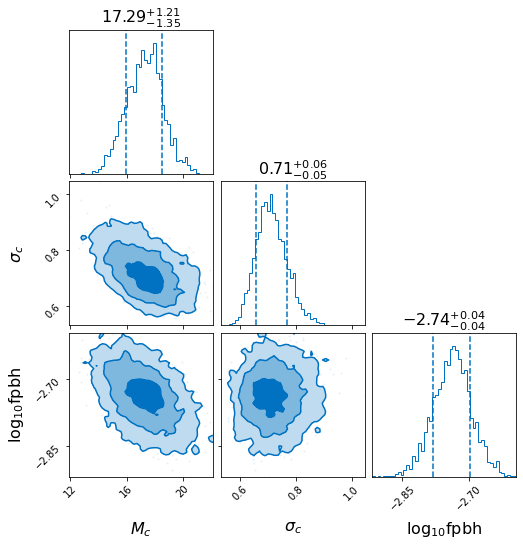

In [10]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [11]:
import numpy as np
np.exp(-1762.438-(-1762.731))

1.3404427904315377

In [12]:
import numpy as np
np.exp(-1762.438-(-1776.472))

1244195.8803820137

In [15]:
import matplotlib.lines as mlines
import numpy as np
import corner
import matplotlib.pyplot as plt

outdir1 = "results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final/"
outdir2 = "results/H0_GWTC-3_PBH-lognormal-2nd_flatLCDM_final/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

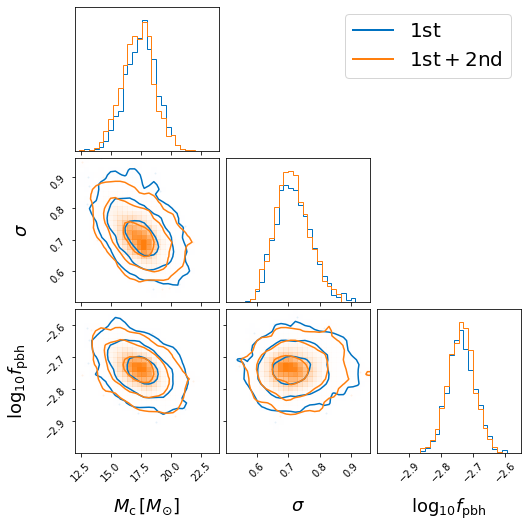

In [16]:
fig = corner.corner(
    posteriors1,
    bins=30,
    smooth=0.9,
    color="#0072C1",
    labels=[r"$M_\mathrm{c}\, [M_{\odot}]$", r"$\sigma$", r"$\log_{10}f_\mathrm{pbh}$"],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=((12, 24), (0.5, 0.96), (-3, -2.55)),
)


corner.corner(
    posteriors2,
    bins=30,
    smooth=0.9,
    color="#FF7F0E",
    labels=[r"$M_\mathrm{c}\, [M_{\odot}]$", r"$\sigma$", r"$\log_{10}f_\mathrm{pbh}$"],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=((12, 24), (0.5, 0.96), (-3, -2.55)),
    fig=fig,
    weights=np.ones(len(posteriors2)) * len(posteriors1) / len(posteriors2),
)

blue_line = mlines.Line2D([], [], color="#0072C1", lw=2, label=r"$\rm{1st}$")
orange_line = mlines.Line2D([], [], color="#FF7F0E", lw=2, label=r"$\rm{1st+2nd}$")
plt.legend(
    handles=[blue_line, orange_line],
    bbox_to_anchor=(1, 3.12),
    loc="upper right",
    fontsize=20,
)  # prop={'size': 8})
plt.savefig("../latex/post-log.pdf")
plt.show()


In [ ]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)


In [ ]:
posts = posteriors2[:, 0]
get_credibles(posts)

(17.31060950152863, 2.214250623140142, 2.046515035005381)

In [ ]:
posts = posteriors2[:, 1]
get_credibles(posts)

(0.708743863834724, 0.09859546321303203, 0.07848575052600681)

In [ ]:
posts = posteriors2[:, 2]
get_credibles(posts)

(-2.7407259972465035, 0.06725654577618245, 0.06799388195344447)